In [2]:
import numpy as np
import IPython.display
IPython.display.display_latex(IPython.display.Latex(filename="./macros.tex"))

# SVM (линейно разделимый случай)

Напомним основные моменты: линейно разделимая выборка, все дела, $x_i$ - примеры, $y_i$ - ответы $y_i$ = {-1, 1}, <$a$, $b$> - скалярное произведение векторов а и b. $$$$
Задача найти оптимальную гиперплоскость для разделения 2 выборок.

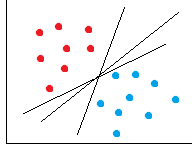

In [4]:
IPython.display.Image("./images/decision_boundary.png")

пусть метки классов +1, -1, тогда получаем (см. прошлую лекцию):
$$y_i(<x_i, \theta>+b)\geq 0$$
$$y_i(<x_i, \theta>+b)\geq \epsilon$$
$$y_i(<x_i, \theta>+b)\geq 1$$

Разделяющая полоса, это все х, такие что:
<br>
$-1\leq(<x_i, \theta>+b)\leq 1$

Возьмем 2 объекта на границе, положительного и отрицательного класса $x_+$ и $x_-$ (так называемые опорные вектора), тогда:
$$b - 1 + <x_+, \theta> = 0$$
$$b + 1 + <x_-, \theta> = 0$$

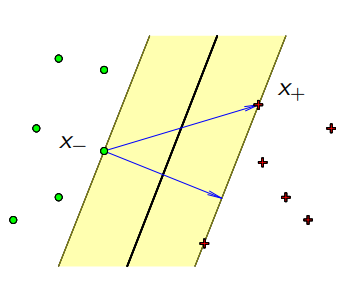

In [5]:
 IPython.display.Image("./images/line_width.png")

Ширина полосы:
$<(x_+-x_-), \frac{\theta}{\lVert{\theta}\rVert}> = \frac{2}{\lVert{\theta}\rVert}$ - максимизируем

Итого, получаем:
$$$$
$\begin{equation*}
 \begin{cases}
  0.5<\theta, \theta>\rightarrow min
  \\
  y_i(<x_i, \theta>+b)\geq 1
 \end{cases}
\end{equation*}$
$$$$
Чтобы решить все вот ето, необходимо воспользоваться теоремой Куна-Такера.

Тогда получаем:
$$$$
$\begin{equation*}
 \begin{cases}
   L(\theta, b) = 0.5<\theta, \theta> - \sum_i \lambda_i({y_i(<x_i, \theta>+b)-1})\rightarrow min_{\theta, b}, max_{\lambda_i}
   \\
   \lambda_i \geq 0
   \\
   \lambda_i (y_i(<x_i, \theta>+b)-1) = 0
 \end{cases}
\end{equation*}$

Ищем производные 
$$\frac{\partial{L}}{\partial\theta_j} = 0 = \theta_j - \sum_i \lambda_iy_ix_{ij}$$
$$\frac{\partial{L}}{\partial{b}} = 0 = \sum_i \lambda_iy_i$$

\begin{equation}\theta = \sum_i \lambda_iy_ix_{i} \ \ \ \ \ \ \ \ \ (1)\end{equation} 
\begin{equation} 0 = \sum_i \lambda_iy_i \ \ \ \ \ \ \ \ \ \ \ (2)\end{equation}
\begin{equation} b = y_i - <x_i, \theta> \end{equation}

Проблема: нету циферок $\lambda_i$
$$$$
Решение: давайте возьмем только что полученные выражения и подставим их.

$$L(\theta, b) = 0.5<\theta, \theta> - \sum_i \lambda_i({y_i(<x_i, \theta>+b)-1}) = $$
$$ 0.5<\theta, \theta> - \sum_i \lambda_i{y_i(<x_i, \theta>+b)} + \sum_i \lambda_i =$$ 
$$ \sum_i \lambda_i + 0.5<\theta, \theta> - \sum_i \lambda_i{y_i<x_i, \theta>} - b\sum_i \lambda_iy_i$$
Последнее выпиливается из-за формулы (2)

$$\sum_i \lambda_i + 0.5<\theta, \theta> - \sum_i \lambda_i{y_i<x_i, \theta>} = $$
$$\sum_i \lambda_i + 0.5<\theta, \theta> - <\sum_i \lambda_i{y_ix_i}, \theta> = $$
Подставляем формулу (1)
$$\sum_i \lambda_i + 0.5<\theta, \theta> - <\theta, \theta> = \sum_i \lambda_i - 0.5<\theta, \theta>$$
$$\sum_i \lambda_i - 0.5<\sum_i \lambda_iy_ix_{i}, \sum_j \lambda_jy_jx_{j}>$$

Последнюю формулу оптимизируем методом градиентного спуска.

# SVM (линейно неразделимый случай)

Если множество линейно неразделимо, то можно к каждому примеру $x_{i}$ добавить ошибку $\zeta_{i}$. как будем добавлять?

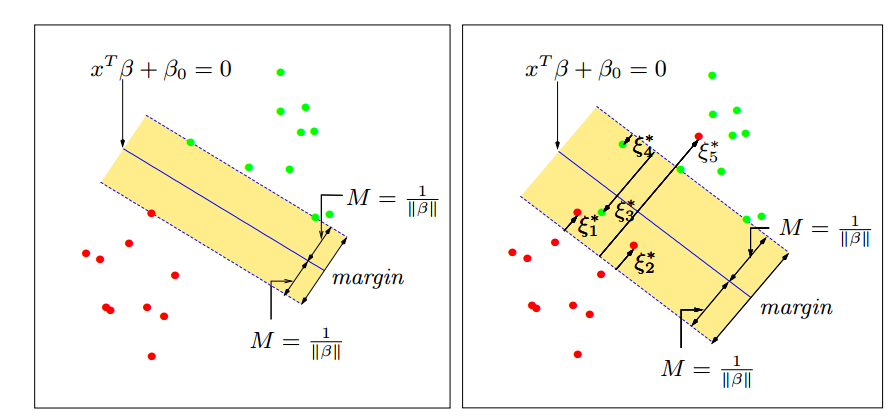

In [4]:
IPython.display.Image("./images/nonlinear_svm.png")

$\zeta^* = M * \zeta$

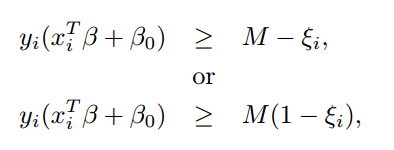

In [5]:
IPython.display.Image("./images/how_to_add_error.png")

Выбираем второй, потому что сводится к выпуклой задаче оптимизации. Тогда получаем

$$$$
$\begin{equation*}
 \begin{cases}
  0.5<\theta, \theta>\rightarrow min
  \\
  y_i(<x_i, \theta>+b)\geq 1 - \zeta_{i}
  \\
  \sum_{i}\zeta_{i} \leq const
  \\
  \zeta_{i} \geq 0
 \end{cases}
\end{equation*}$
$$$$


$$$$
$\begin{equation*}
 \begin{cases}
  0.5<\theta, \theta> + C*\sum_{i}\zeta_{i} \rightarrow min
  \\
  y_i(<x_i, \theta>+b)\geq 1 - \zeta_{i}
  \\
  \zeta_{i} \geq 0
 \end{cases}
\end{equation*}$
$$$$

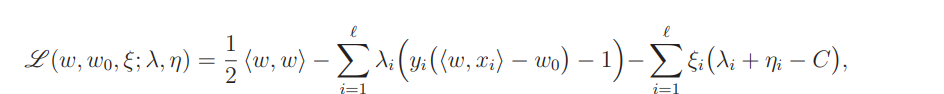

In [11]:
IPython.display.Image("./images/non_linear_lagrange.png")

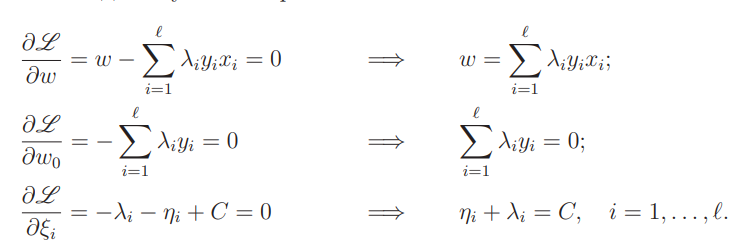

In [9]:
IPython.display.Image("./images/conditions.png")

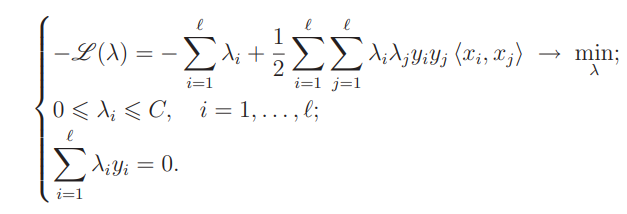

In [10]:
IPython.display.Image("./images/sgd_optim.png")

# Kernel tricks

Что если взять, выполнить некоторое преобразование $\psi$ над базовыми признаками объектов $x_{i}$? Как это отразится на процедуре оптимизации?

Ответ: никак. Надо только лишь выбрать $\psi$ грамотно. Грамотно это значит, чтобы $\psi$ переводила в пространство со скалярным произведением. 

При этом, мы напрямую признаки нигде не используем, а только лишь скалярные произведения. 
$$$$
Что если попробовать честные скалярные произведения заменить на функцию?

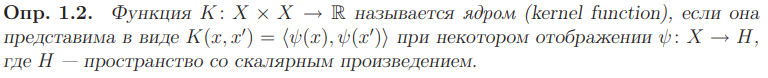

In [5]:
IPython.display.Image("./images/kernel_defenition.png")

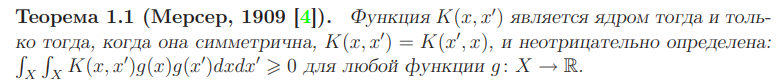

In [4]:
IPython.display.Image("./images/mercer_theorem.png")

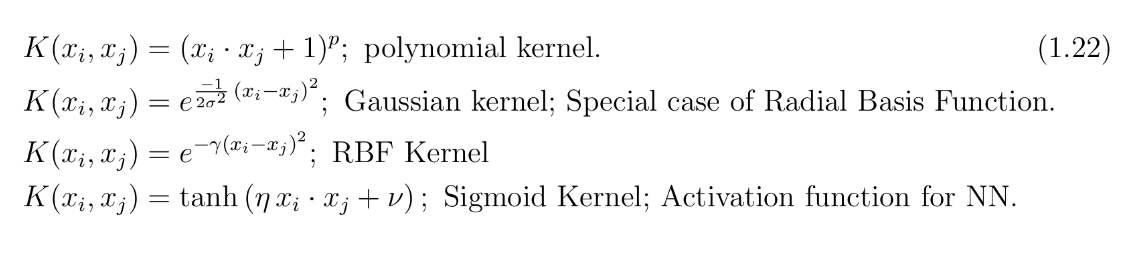

In [3]:
IPython.display.Image("./images/most_common_kernels.png")

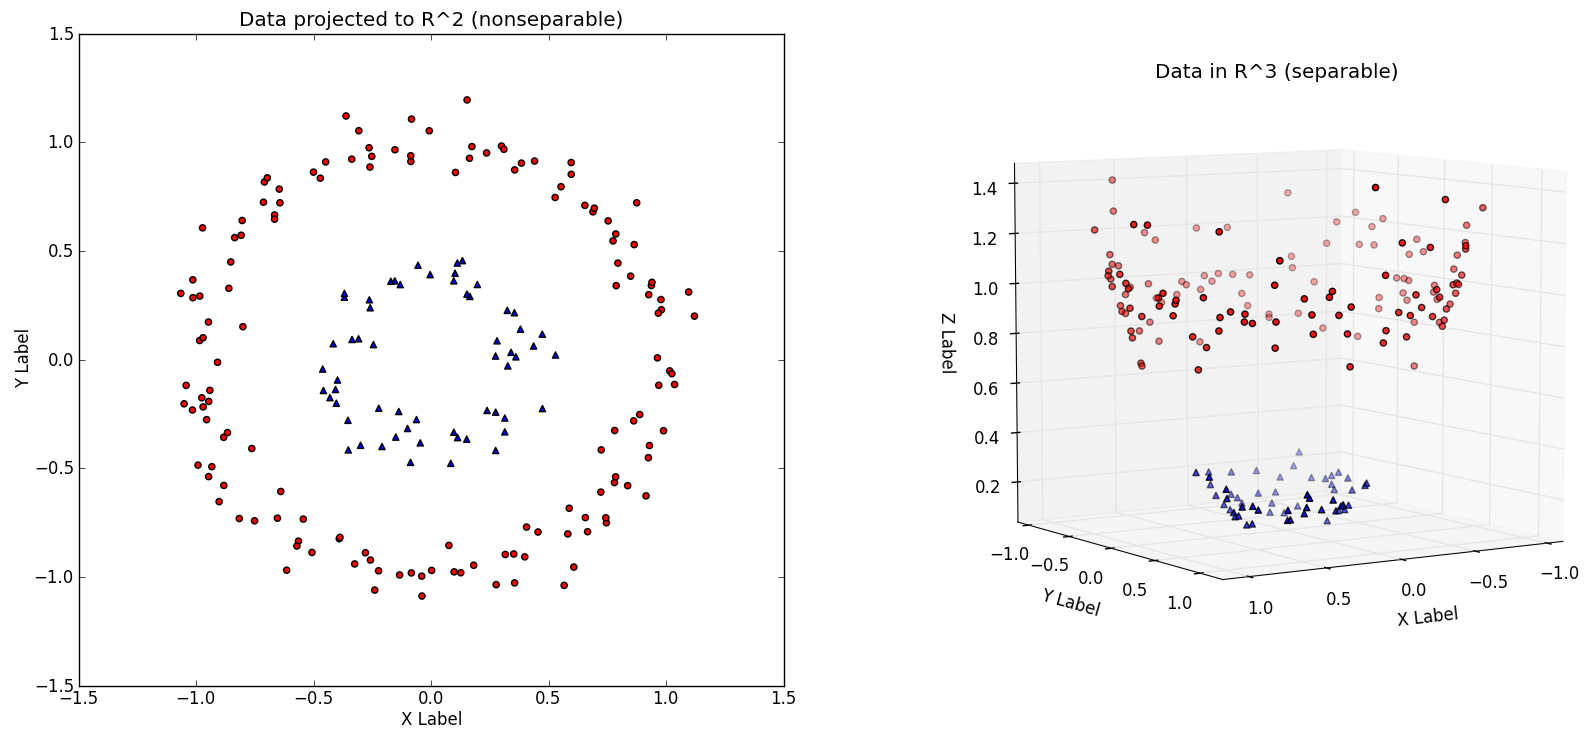

In [8]:
IPython.display.Image("./images/data_2d_to_3d.png")

# Классификация на несколько классов.

## One vs all

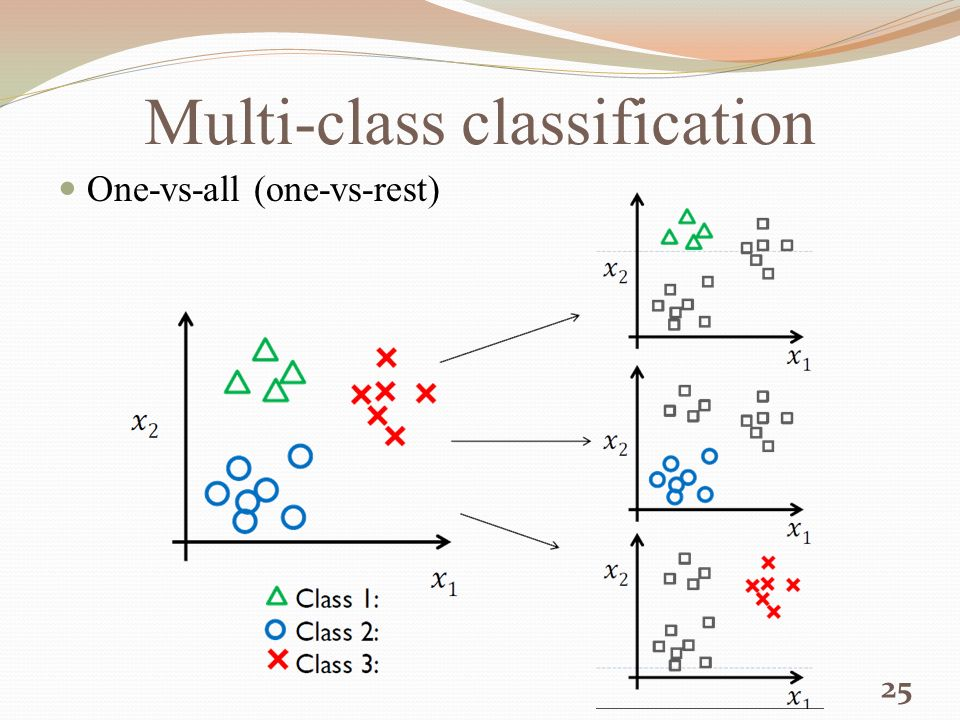

In [6]:
IPython.display.Image("./images/one_vs_all.jpg")

## All vs all

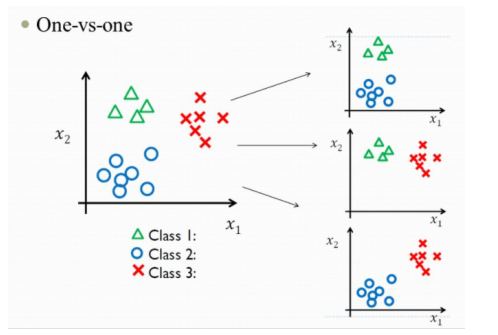

In [7]:
IPython.display.Image("./images/one vs one.png")

# Softmax

In [ ]:
ln(P_i) = XW_i - Z
ln(P_i) = XW_i - Z